# Modelling Classical, probabilistic, and Quantum Systems

## Classical Discrete Systems
![Deterministic System](images/ClassicPhysicalSystem.png)



Modeling the dynamic behaviors and the state of a classical discrete system using matrices and vectors. The state after one click is computed as follows:

$$ 
    \begin{bmatrix} 0 && 0 && 0 && 0 && 0 && 0 \\
                   0 && 0 && 0 && 0 && 0 && 0 \\
                   0 && 1 && 0 && 0 && 0 && 1 \\
                   0 && 0 && 0 && 1 && 0 && 0 \\
                   0 && 0 && 1 && 0 && 0 && 0 \\
                   1 && 0 && 0 && 0 && 1 && 0 \\
    \end{bmatrix}
    \begin{bmatrix} 6 \\
                    2 \\
                    1 \\
                    5 \\
                    3 \\
                    10 \\
    \end{bmatrix}
    =
    \begin{bmatrix} 0 \\
                    0 \\
                    12 \\
                    5 \\
                    1 \\
                    9 \\
    \end{bmatrix}$$

In [ ]:
import numpy as np

# Define two 3x3 complex matrices
m1 = np.array([[0,0,0,0,0,0], 
               [0,0,0,0,0,0], 
               [0,1,0,0,0,1],
               [0,0,0,1,0,0], 
               [0,0,1,0,0,0], 
               [1,0,0,0,1,0]])

v1 = np.array([[6], [2], [1], [5], [3], [10]])


print("Input: ", m1,v1)

# Multiplying a 3x3 matrix by a 3x1 vector
state_after_one_click = np.dot(m1, v1)
print("Result after one Click: ", state_after_one_click)

![State after two clicks.](images/ClassicPhysicalSystem2.png)

The state after two cliks is computed as follows:

In [ ]:
print("Result after two clicks: ", np.dot(m1,state_after_one_click))

## Exercises 



### Ejercicio 1:
#### Escribe un programa para modelar el comportamiento del experimento probabilístico de la doble rendija representado en la figura.
#### Muestra los resultados del experimento usando un diagrama de barras. Cada barra representa la intensidad de la luz en un objetivo específico.


![Probabilistic Double slit.](images/ProbabilisticSystem.png)

## Solucion ejercicio 1


Matriz de Doble Rendija Probabilistico:
0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
0.50 0.00 0.00 0.00 0.00 0.00 0.00 0.00
0.50 0.00 0.00 0.00 0.00 0.00 0.00 0.00
0.00 0.33 0.00 1.00 0.00 0.00 0.00 0.00
0.00 0.33 0.33 0.00 1.00 0.00 0.00 0.00
0.00 0.33 0.33 0.00 0.00 1.00 0.00 0.00
0.00 0.00 0.33 0.00 0.00 0.00 1.00 0.00
0.00 0.00 0.00 0.00 0.00 0.00 0.00 1.00


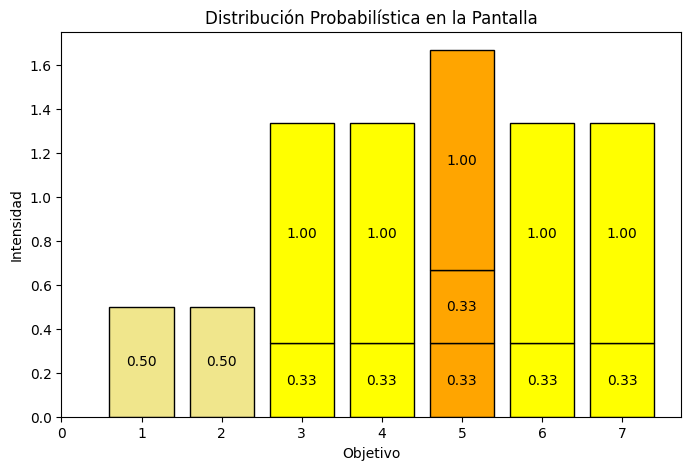

In [1]:
import numpy as np
import matplotlib.pyplot as plt
## Se define el tamaño de la matriz como nxn donde n es 8
n = 8
matrizR = np.zeros((n, n))


## para los valores de la primera divicion se le asigna la mitad de 1 que es 1/2
matrizR[0, 1] = matrizR[0, 2] = 1 / 2  

## despues de obtener los valores anteriores empezamos desde la columna 1 y 2 e iteramos que esos valores sean 1/3 
for i in [1, 2]:  
    for j in range(3):  
        matrizR[i, i + j + 2] = 1 / 3  

## Agregamos la diagonal de 1 que esta apartir de 3
for i in range(3, n):  
    matrizR[i, i] = 1
    

## se define el print de la matriz para que este quede mas formal y bonito
print("Matriz de Doble Rendija Probabilistico:")
for col in zip(*matrizR):  
    print(" ".join(f"{x:.2f}" if x > 0 else "0.00" for x in col))
    
## se definen los valores de x apartir de n
x = np.arange(n)

## se calcula la suma de cada uno de los valores en y
y = matrizR.sum(axis=0)  

## se define el lienzo donde se ubicaran los valores de la matriz
fig, ax = plt.subplots(figsize=(8, 5))


## se define que no hay valor en 0 y que color corresponderia a cada una de las posibles probabilidades y se colocan las barras
for xi, yi in zip(x, y):
    if yi == 0:
        continue  
    
    if xi in [3, 4, 6, 7]:  
        ax.bar(xi, 1/3, color="yellow", edgecolor="black")  
        ax.bar(xi, 1, bottom=1/3, color="yellow", edgecolor="black")  
    elif xi == 5:  
        ax.bar(xi, 1/3, color="orange", edgecolor="black")  
        ax.bar(xi, 1/3, bottom=1/3, color="orange", edgecolor="black")  
        ax.bar(xi, 1, bottom=2/3, color="orange", edgecolor="black")  
    else:  
        ax.bar(xi, yi, color="white" if yi == 1 else "khaki" if yi == 0.5 else "white", edgecolor="black")


# Para facilitar la visualizacion se definen que indica cada barra osea que valor tiene esa barra
for xi, yi in zip(x, y):
    if yi == 0:
        continue
    
    if xi in [3, 4, 6, 7]:
        plt.text(xi, 1/6, f"{1/3:.2f}", ha='center', va='center', fontsize=10, color="black")
        plt.text(xi, 1/3 + 1 / 2, f"{1:.2f}", ha='center', va='center', fontsize=10, color="black")
    elif xi == 5:
        plt.text(xi, 1/6, f"{1/3:.2f}", ha='center', va='center', fontsize=10, color="black")
        plt.text(xi, 1/3 + 1/6, f"{1/3:.2f}", ha='center', va='center', fontsize=10, color="black")
        plt.text(xi, 2/3 + 1/2, f"{1:.2f}", ha='center', va='center', fontsize=10, color="black")
    else:
        plt.text(xi, yi / 2, f"{yi:.2f}", ha='center', va='center', fontsize=10, color="black")

plt.xticks(x)
plt.xlabel("Objetivo")
plt.ylabel("Intensidad")
plt.title("Distribución Probabilística en la Pantalla")
plt.show()

### Ejercicio 2:
#### Escribe un programa para modelar el comportamiento del experimento de la doble rendija cuántica representado en la figura.
#### Muestra los resultados del experimento usando un diagrama de barras. Cada barra representa la intensidad de la luz en un objetivo específico.


![Probabilistic Double slit.](images/QuantumSystem.png)

## Solucion Ejercicio 2

Matriz de Doble Rendija Cuántica:
0.00+0.00j 0.00+0.00j 0.00+0.00j 0.00+0.00j 0.00+0.00j 0.00+0.00j 0.00+0.00j 0.00+0.00j
0.50+0.00j 0.00+0.00j 0.00+0.00j 0.00+0.00j 0.00+0.00j 0.00+0.00j 0.00+0.00j 0.00+0.00j
0.50+0.00j 0.00+0.00j 0.00+0.00j 0.00+0.00j 0.00+0.00j 0.00+0.00j 0.00+0.00j 0.00+0.00j
0.00+0.00j -0.41+0.41j 0.00+0.00j 1.00+0.00j 0.00+0.00j 0.00+0.00j 0.00+0.00j 0.00+0.00j
0.00+0.00j -0.41-0.41j 0.00+0.00j 0.00+0.00j 1.00+0.00j 0.00+0.00j 0.00+0.00j 0.00+0.00j
0.00+0.00j 0.41-0.41j -0.41+0.41j 0.00+0.00j 0.00+0.00j 1.00+0.00j 0.00+0.00j 0.00+0.00j
0.00+0.00j 0.00+0.00j -0.41-0.41j 0.00+0.00j 0.00+0.00j 0.00+0.00j 1.00+0.00j 0.00+0.00j
0.00+0.00j 0.00+0.00j 0.41-0.41j 0.00+0.00j 0.00+0.00j 0.00+0.00j 0.00+0.00j 1.00+0.00j


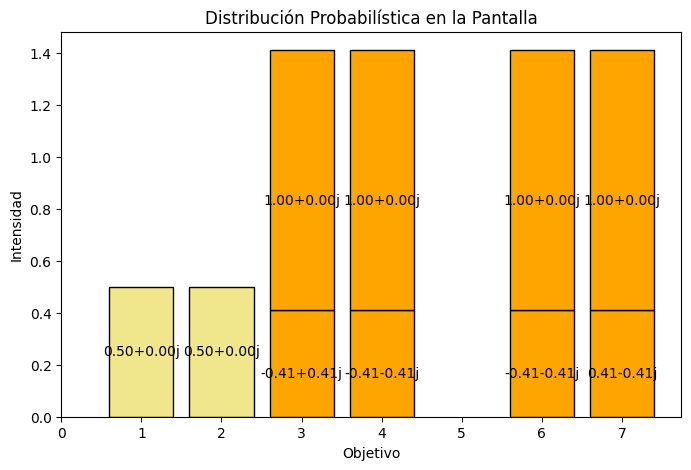

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math
## se define una matriz de numeros complejos de tamaño nxn
n = 8
matrizR = np.zeros((n, n), dtype=complex)  

## Definimos los valores que son importantes
i = 1j  
sqrt6 = math.sqrt(6)
## Primera division 1/2 en la primera fila
matrizR[0, 1] = matrizR[0, 2] = 1 / 2

## Asignamos los valores de la matriz
matrizR[1, 3] = matrizR[2, 5] = (-1 + i) / sqrt6
matrizR[1, 4] = matrizR[2, 6] = (-1 - i) / sqrt6
matrizR[1, 5] = matrizR[2, 7] = (1 - i) / sqrt6

## Se asignan los valores de la diagonal desde 3
for i in range(3, n):
    matrizR[i, i] = 1

## Imprimimos la matriz de forma mas bonita
print("Matriz de Doble Rendija Cuántica:")
for col in zip(*matrizR):
    print(" ".join(f"{x.real:.2f}{'+' if x.imag >= 0 else '-'}{abs(x.imag):.2f}j" if x != 0 else "0.00+0.00j" for x in col))
    

## se definen los valores de x apartir de n
x = np.arange(n)

## se calcula la suma de cada uno de los valores en y
y = matrizR.sum(axis=0)  

## se define el lienzo donde se ubicaran los valores de la matriz
fig, ax = plt.subplots(figsize=(8, 5))


## se define que no hay valor en 0 y que color corresponderia a cada una de las posibles probabilidades y se colocan las barras
for xi, yi in zip(x, y):
    if yi == 0 :
        continue  
    
    if xi in [3, 4, 6, 7]:  
        ax.bar(xi, 0.41, color="orange", edgecolor="black")  
        ax.bar(xi, 1, bottom=0.41, color="orange", edgecolor="black") 
    elif xi == 5:
        continue
    else:  
        ax.bar(xi, yi, color="white" if yi == 1 else "khaki" if yi == 0.5 else "white", edgecolor="black")


# Para facilitar la visualizacion se definen que indica cada barra osea que valor tiene esa barra
for xi, yi in zip(x, y):
    if yi == 0:
        continue
    
    if xi == 3:
        plt.text(xi, 1/6, f"{-0.41+0.41j:.2f}", ha='center', va='center', fontsize=10, color="black")
        plt.text(xi, 1/3 + 1 / 2, f"{1.00+0.00j:.2f}", ha='center', va='center', fontsize=10, color="black")
    elif xi == 4:
        plt.text(xi, 1/6, f"{-0.41-0.41j:.2f}", ha='center', va='center', fontsize=10, color="black")
        plt.text(xi, 1/3 + 1 / 2, f"{1.00+0.00j:.2f}", ha='center', va='center', fontsize=10, color="black")
    elif xi == 6:
        plt.text(xi, 1/6, f"{-0.41-0.41j:.2f}", ha='center', va='center', fontsize=10, color="black")
        plt.text(xi, 1/3 + 1 / 2, f"{1.00+0.00j:.2f}", ha='center', va='center', fontsize=10, color="black")
    elif xi == 7:
        plt.text(xi, 1/6, f"{0.41-0.41j:.2f}", ha='center', va='center', fontsize=10, color="black")
        plt.text(xi, 1/3 + 1 / 2, f"{1.00+0.00j:.2f}", ha='center', va='center', fontsize=10, color="black")
    elif xi == 5:
        continue
    else:
        plt.text(xi, yi / 2, f"{yi:.2f}", ha='center', va='center', fontsize=10, color="black")

plt.xticks(x)
plt.xlabel("Objetivo")
plt.ylabel("Intensidad")
plt.title("Distribución Probabilística en la Pantalla")
plt.show()



### Objetivo
En este ejercicio, crearás una simulación del experimento de la doble rendija usando Python. A diferencia de las interpretaciones basadas en partículas, modelarás la luz como ondas y observarás el patrón de interferencia que emerge cuando las ondas pasan a través de dos rendijas y se superponen en una pantalla. Esta simulación te ayudará a visualizar cómo se forman los patrones de interferencia constructiva y destructiva.

### Antecedentes
El experimento de la doble rendija demuestra la dualidad onda-partícula de la luz y la materia. Cuando la luz coherente pasa a través de dos rendijas cercanas, crea un patrón de interferencia de franjas brillantes y oscuras en una pantalla de detección. Este patrón es el resultado de la interferencia constructiva y destructiva de las ondas que emergen de las rendijas.

### References

[Mathematics of Interference](https://phys.libretexts.org/Bookshelves/University_Physics/University_Physics_(OpenStax)/University_Physics_III_-_Optics_and_Modern_Physics_(OpenStax)/03%3A_Interference/3.03%3A_Mathematics_of_Interference)

### Tarea
Tu tarea es simular el patrón de interferencia de ondas usando Python. Supón que cada rendija actúa como una fuente puntual de ondas que se propagan en patrones circulares. Cuando estas ondas se superponen, interfieren entre sí, creando un patrón de intensidad alternante en una pantalla.

### Pasos
Configurar el entorno: Asegúrate de tener Python instalado junto con las bibliotecas necesarias: NumPy para cálculos numéricos y Matplotlib para graficar.

### Definir parámetros:

Establece la distancia entre las rendijas, la longitud de onda de la luz, la distancia de las rendijas a la pantalla y el número de puntos en la pantalla donde se calculará la intensidad.
Modelar las ondas:

Para simplificar, puedes suponer que los frentes de onda son líneas rectas perpendiculares a la dirección de propagación. Usa el principio de Huygens-Fresnel para modelar cada rendija como una fuente de nuevas ondas.
### Calcular la intensidad:

Usa el principio de superposición para calcular la amplitud resultante de la onda en cada punto de la pantalla sumando las contribuciones de cada rendija.
La intensidad de la luz en cada punto es proporcional al cuadrado de la amplitud de la onda resultante.
Graficar los resultados:

Representa el patrón de intensidad calculado en la pantalla. Deberías observar una serie de franjas brillantes y oscuras que demuestran el patrón de interferencia.
Consejos
Usa arreglos de NumPy para calcular de manera eficiente las amplitudes e intensidades de onda a lo largo de la pantalla.
Recuerda que la diferencia de fase entre las ondas de las dos rendijas determina si hay interferencia constructiva (en fase) o destructiva (fuera de fase).
### Esqueleto de código de ejemplo











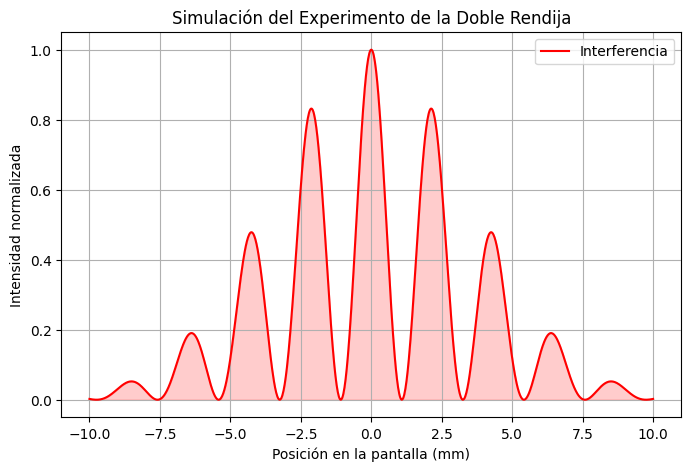

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parametros del experimento
### longitud de onda en metros (luz roja)
wavelength = 650e-9 
### Separacion de las rendijas en metros 
d = 0.0003
### Distancia de las rendijas a la pantalla en metros  
D = 1.0 
### Extencion de la pantalla en metros 
x_max = 0.01  
### numero de puntos en la simulacion
n_points = 1000  

# Coordenadas en la pantalla
x = np.linspace(-x_max, x_max, n_points)

# Angulo de difraccion para cada punto en la pantalla
theta = np.arctan(x / D)

# Diferencia de camino optico
path_difference = d * np.sin(theta)

# Intensidad de interferencia
I_interference = (np.cos(np.pi * path_difference / wavelength))**2

# Envolvente gaussiana (disminucion de intensidad)
sigma = x_max / 2  
I_envelope = np.exp(- (x / sigma)**2)

# Intensidad total considerando interferencia y envolvente
I_total = I_interference * I_envelope

## Se realiza la grafica de las ondas
plt.figure(figsize=(8,5))
plt.plot(x * 1e3, I_total, 'r', label='Interferencia') 
plt.fill_between(x * 1e3, I_total, color='red', alpha=0.2)
plt.xlabel("Posicion en la pantalla (mm)")
plt.ylabel("Intensidad normalizada")
plt.title("Simulacion del Experimento de la Doble Rendija")
plt.legend()
plt.grid(True)
plt.show()